### Importing the requried libraries 

In [55]:
import numpy as np                               # NumPy lib is used to perform a wide variety of mathematical operations on arrays.
import pandas as pd                              # pandas lib is used for tabular data preprocessing and cleaning
import matplotlib.pyplot as plt                  # matplotlib lib is used for drawing visualizations for the data
import seaborn as sns                            # seaborn lib is used for drawing visualizations for the data
from sklearn.model_selection import train_test_split # train_test_split used to split the dataset into train data and test data.
from sklearn.linear_model import LogisticRegression #used to analyze and model relationships between a binary dependent variable and one or more independent variables
from sklearn.naive_bayes import GaussianNB # describes the relationship between conditional probabilities of two events.
from sklearn.ensemble import RandomForestClassifier # It is based on decision trees, which are simple yet powerful models for predicting outcomes based on a set of input features.
from sklearn.metrics import accuracy_score # used in machine learning to evaluate the accuracy of a classification model. It is a measure of how well the model predicts the correct class label for the input data.
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Classifier is an ensemble machine learning algorithm that is widely used for classification tasks. 
import xgboost as xg #It is based on the Gradient Boosting algorithm and has been optimized for both speed and accuracy.
import warnings                    # filterwarnings is used for filtering and supressing any warnings during the data cleaning.
warnings.filterwarnings('ignore')

### Loading the data set

In [57]:
data=pd.read_csv(r"C:\Users\Gogula Vinay\OneDrive\HBIC Solutions\Day to day\05-Apr-2023\chess_games.csv")
data.head()    # .head() will return you the top 5 rows of the dataset.

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


### Finding duplicats

In [58]:
data.duplicated().sum() # Duplicat command is used to findout the duplicate row in the given dataset

0

### Observation
1. There are no duplicats in the dataset

In [59]:
data.shape # The shape of the data set is given in the tuple formate.

(20058, 17)

### Observation
1. There are 20058 datapoints and 17 columns in the data set

In [61]:
data.drop(['game_id'],axis=1,inplace=True)
data.head()

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


### Observation:
1. Droping the unnecessary column

### Basic information of the dataset

In [62]:
data.info() # info is a function that returns the basic iformation like number of non-null values, dtype and all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   winner             20058 non-null  object
 4   time_increment     20058 non-null  object
 5   white_id           20058 non-null  object
 6   white_rating       20058 non-null  int64 
 7   black_id           20058 non-null  object
 8   black_rating       20058 non-null  int64 
 9   moves              20058 non-null  object
 10  opening_code       20058 non-null  object
 11  opening_moves      20058 non-null  int64 
 12  opening_fullname   20058 non-null  object
 13  opening_shortname  20058 non-null  object
 14  opening_response   1207 non-null   object
 15  opening_variation  14398 non-null  object
dtypes: bool(1), int64(4), object(11)
memory 

### Statistical information of the numarical columns.

In [64]:
data.describe() # .describe() used to on the numarical columns and it will return the discriptive statistics of the values.

,turns,white_rating,black_rating,opening_moves
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [63]:
data.columns # columns use to see all the columns that are preent in the dataset

Index(['rated', 'turns', 'victory_status', 'winner', 'time_increment',
       'white_id', 'white_rating', 'black_id', 'black_rating', 'moves',
       'opening_code', 'opening_moves', 'opening_fullname',
       'opening_shortname', 'opening_response', 'opening_variation'],
      dtype='object')

In [7]:
data.isnull().sum()  # isnull().sum() used to see the number of null values in the data column

rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

### Observation.
1. there are missing values in opening_response, opening_variation

In [65]:
data.nunique()
# nuique is used to see the number of unique values present in the all the columns

rated                    2
turns                  211
victory_status           4
winner                   3
time_increment         400
white_id              9438
white_rating          1516
black_id              9331
black_rating          1521
moves                18920
opening_code           365
opening_moves           23
opening_fullname      1477
opening_shortname      128
opening_response         3
opening_variation      615
dtype: int64

### Observation.
1. since there are lots of missing values in the column opening_response drop the column.

In [66]:
data.drop(['opening_response'],axis=1,inplace=True)
data.head()

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_variation
0,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,Exchange Variation
1,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Kennedy Variation
2,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,Leonardis Variation
3,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,Zukertort Variation
4,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN


In [9]:
data.isnull().sum()

rated                   0
turns                   0
victory_status          0
winner                  0
time_increment          0
white_id                0
white_rating            0
black_id                0
black_rating            0
moves                   0
opening_code            0
opening_moves           0
opening_fullname        0
opening_shortname       0
opening_variation    5660
dtype: int64

In [10]:
data.dropna(axis=0,inplace=True) # Droping the missing values
data.shape

(14398, 15)

In [11]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print('*-*'*20)

rated
True     11636
False     2762
Name: rated, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
turns
51     232
57     226
53     223
45     223
41     222
      ... 
255      1
216      1
205      1
218      1
201      1
Name: turns, Length: 204, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
victory_status
Resign         8152
Mate           4397
Out of Time    1180
Draw            669
Name: victory_status, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
winner
White    7241
Black    6457
Draw      700
Name: winner, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
time_increment
10+0     5596
15+0      976
15+15     595
5+5       547
5+8       460
         ... 
19+2        1
14+5        1
19+8        1
35+0        1
8+45        1
Name: time_increment, Length: 356, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
white_id
taranga          57
a_p_t_e_m_u_u  

<AxesSubplot:ylabel='rated'>

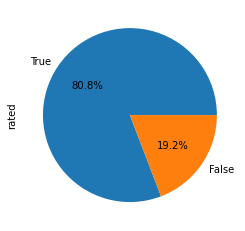

In [12]:
# Pie plot on rated column
data['rated'].value_counts().plot(kind='pie',autopct='%0.1f%%') 

### Observation:
1. the 80.8% of data contains True rates 

<AxesSubplot:ylabel='victory_status'>

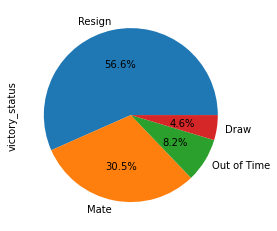

In [13]:
# Pie plot on victory_status column
data['victory_status'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Observation:
1. 56% of the victory status data contains resign 

<AxesSubplot:ylabel='winner'>

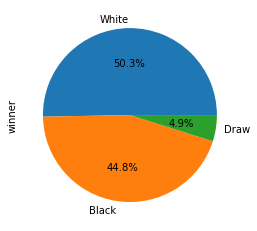

In [14]:
# Pie plot on winner column
data['winner'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [15]:
# Drop the draw matchs
data[data['winner']=='Draw']

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_variation
5,False,5,Draw,Draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,4,Sicilian Defense: Mongoose Variation,Sicilian Defense,Mongoose Variation
40,False,32,Draw,Draw,20+25,white_queen_1990,1207,shivangithegenius,978,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 Bg5 Bg7 B...,B70,10,Sicilian Defense: Dragon Variation,Sicilian Defense,Dragon Variation
98,True,113,Draw,Draw,15+0,avelez8,1745,anonymous1705,1714,d4 d5 c4 Nf6 Nc3 Bf5 Bf4 a6 Nf3 e6 a3 Nc6 e3 B...,D06,4,Queen's Gambit Refused: Marshall Defense,Queen's Gambit,Marshall Defense
126,True,120,Draw,Draw,15+15,sureka_akshat,1139,sassou,1212,e4 Nf6 Nc3 e5 Nf3 Nc6 Bc4 Bc5 O-O O-O d3 d6 h3...,C50,8,Four Knights Game: Italian Variation,Four Knights Game,Italian Variation
181,True,107,Draw,Draw,15+5,isachess,1866,claudiucojo,1835,e4 e5 Nf3 Nc6 Bc4 Nf6 d3 h6 O-O Bc5 a4 O-O c3 ...,C55,7,Italian Game: Two Knights Defense | Modern Bi...,Italian Game,Two Knights Defense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20003,True,103,Draw,Draw,30+30,moistvonlipwig,2283,chess4life,2358,e4 c5 Nc3 e6 f4 d5 Nf3 dxe4 Nxe4 Nc6 b3 Nf6 Bd...,B23,4,Sicilian Defense: Closed,Sicilian Defense,Closed
20004,True,109,Draw,Draw,30+30,god666,2214,moistvonlipwig,2286,f4 d5 Nf3 Nf6 e3 g6 Be2 Bg7 O-O O-O b3 Ne4 Ne5...,A03,2,Bird Opening: Dutch Variation,Bird Opening,Dutch Variation
20011,True,63,Draw,Draw,45+45,moistvonlipwig,2239,atrophied,2401,e4 c5 Nc3 Nc6 f4 g6 Nf3 Bg7 Bb5 Nd4 O-O Nxb5 N...,B23,5,Sicilian Defense: Grand Prix Attack,Sicilian Defense,Grand Prix Attack
20014,True,109,Draw,Draw,45+45,moistvonlipwig,2229,mn8,2220,e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Nf6 d4 exd4 cxd4 Bb4+...,C54,17,Italian Game: Classical Variation | Greco Gam...,Italian Game,Classical Variation


In [16]:
a=data[data['winner']=='Draw'].index
a

Int64Index([    5,    40,    98,   126,   181,   220,   291,   301,   319,
              326,
            ...
            19834, 19931, 19937, 19974, 19993, 20003, 20004, 20011, 20014,
            20034],
           dtype='int64', length=700)

In [17]:
data.drop(a,axis=0,inplace=True)
data.shape

(13698, 15)

<AxesSubplot:ylabel='winner'>

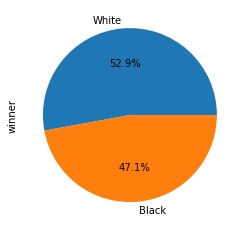

In [18]:
data['winner'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Observation
1. data after removeing draw matches. 

Text(0, 0.5, 'opening_moves')

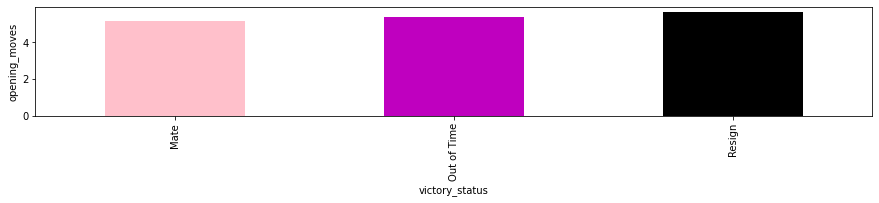

In [19]:
y=data.groupby(['victory_status'])['opening_moves']
plt.figure(figsize=(15,2))
y.mean().plot(kind='bar',color=['pink', 'm', 'black', 'g' ])
plt.xlabel('victory_status')
plt.ylabel('opening_moves')

### Observation:
1. victory_status of resign are more when compared with opening_moves

Text(0, 0.5, 'turns')

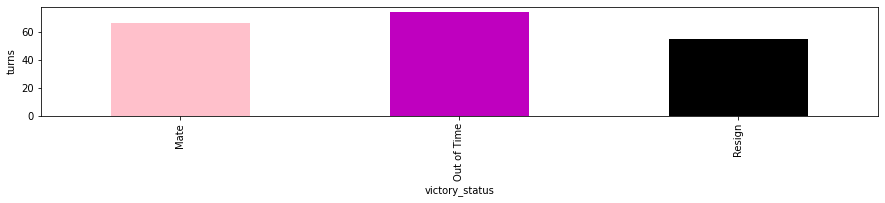

In [20]:
y=data.groupby(['victory_status'])['turns']
plt.figure(figsize=(15,2))
y.mean().plot(kind='bar',color=['pink', 'm', 'black', 'g' ])
plt.xlabel('victory_status')
plt.ylabel('turns')

### Observation:
1. victory_status column contains more out of time compared with tuns. 

Text(0.5, 0, 'turns')

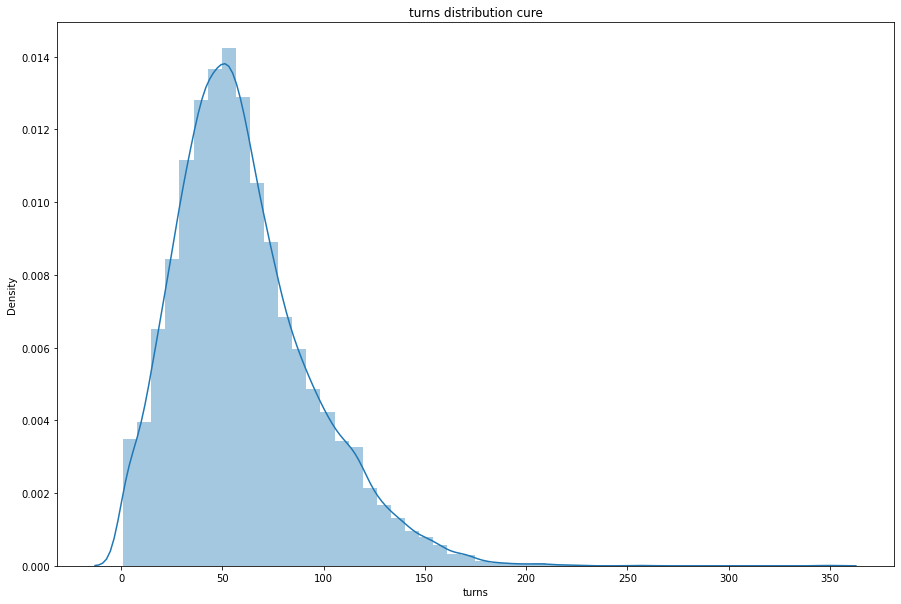

In [67]:
# distplot
plt.figure(figsize=(15,10))
sns.distplot(x=data.turns) 
plt.title('turns distribution cure')
plt.xlabel('turns')

### Observation:
1. the maxium players are having 50 number of turns

### findig outliers

<AxesSubplot:xlabel='turns'>

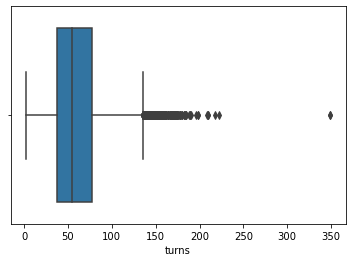

In [22]:
sns.boxplot(data['turns'])

<AxesSubplot:xlabel='opening_moves'>

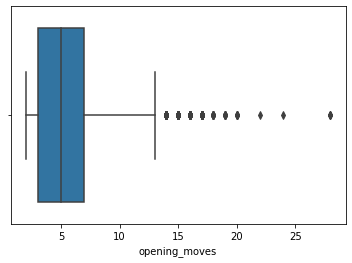

In [23]:
sns.boxplot(data['opening_moves'])

In [ ]:
### Observation.
1. There are lots of ouliers in in turns column,
2. removing the outliers using IQR method.

In [24]:
turns_l=np.percentile(data['turns'].values,[25,50,75])
turns_iqr=turns_l[-1]-turns_l[0]
turns_lw=turns_l[0]-(1.5*turns_iqr)
turns_uw=turns_l[-1]+(1.5*turns_iqr)
turns_a=data.loc[(data['turns']<turns_lw)]
turns_b=data.loc[(data['turns']>turns_uw)]
print('turns_a',turns_a.index)
print('turns_b',turns_b.index)

turns_a Int64Index([], dtype='int64')
turns_b Int64Index([  108,   180,   190,   213,   265,   582,   827,   916,  1067,
             1090,
            ...
            19618, 19723, 19817, 19819, 19842, 19882, 19922, 19940, 19947,
            19990],
           dtype='int64', length=366)


### Observation
1. the outliers are toward the upperwiscus

In [25]:
data.loc[turns_b.index,'turns']=turns_uw

<AxesSubplot:xlabel='turns'>

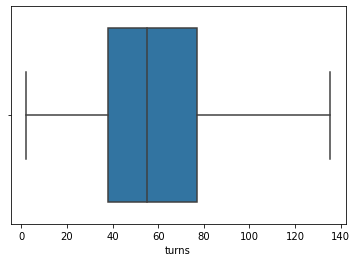

In [26]:
sns.boxplot(data['turns'])

<AxesSubplot:>

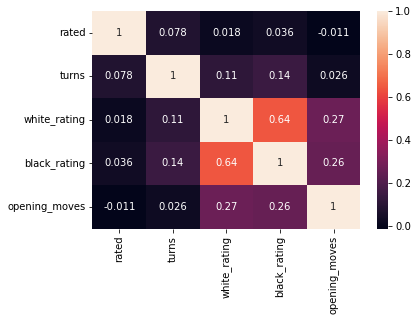

In [27]:
sns.heatmap(data.corr(),annot=True)   #heatmap

In [28]:
ndata=data[['rated','turns','victory_status','winner','opening_moves','white_rating','black_rating']]
ndata

,rated,turns,victory_status,winner,opening_moves,white_rating,black_rating
0,False,13.0,Out of Time,White,5,1500,1191
1,True,16.0,Resign,Black,4,1322,1261
2,True,61.0,Mate,White,3,1496,1500
3,True,61.0,Mate,White,3,1439,1454
6,True,33.0,Resign,White,10,1520,1423
...,...,...,...,...,...,...,...
20049,True,43.0,Mate,White,5,1328,1252
20050,True,9.0,Out of Time,White,2,1243,1142
20051,True,58.0,Mate,Black,3,1237,1231
20055,True,35.0,Mate,White,3,1219,1286


In [29]:
datanew=ndata[['opening_moves']]

In [30]:
data_num=ndata[['turns','white_rating','black_rating']]
data_num

,turns,white_rating,black_rating
0,13.0,1500,1191
1,16.0,1322,1261
2,61.0,1496,1500
3,61.0,1439,1454
6,33.0,1520,1423
...,...,...,...
20049,43.0,1328,1252
20050,9.0,1243,1142
20051,58.0,1237,1231
20055,35.0,1219,1286


In [31]:
scaler = StandardScaler()

data_num = pd.DataFrame(scaler.fit_transform(data_num),
                                    columns=data_num.columns,
                                    index = data_num.index
                                   )
data_num
# Applying StandardScaler on the numarical column, to avoid the scaling issue.

,turns,white_rating,black_rating
0,-1.540365,-0.403453,-1.440984
1,-1.441666,-1.020672,-1.198823
2,0.038818,-0.417324,-0.372020
3,0.038818,-0.614972,-0.531154
6,-0.882372,-0.334103,-0.638396
...,...,...,...
20049,-0.553376,-0.999867,-1.229958
20050,-1.671964,-1.294606,-1.610496
20051,-0.059881,-1.315411,-1.302606
20055,-0.816573,-1.377826,-1.112338


In [34]:
encoder_=LabelEncoder() # LabelEncoder is use to convert the catogorical columns into o and 1.
data_cat = ndata[['rated','victory_status','winner']]
data_cat.head()

,rated,victory_status,winner
0,False,Out of Time,White
1,True,Resign,Black
2,True,Mate,White
3,True,Mate,White
6,True,Resign,White


In [36]:
data_cat['rated']=encoder_.fit_transform(ndata['rated'])
data_cat['victory_status']=encoder_.fit_transform(ndata['victory_status'])
data_cat['winner']=encoder_.fit_transform(ndata['winner'])
# data_cat contains the catogorical columns.

In [37]:
data_transformed = pd.concat([datanew,data_num,data_cat],axis=1)
data_transformed.head() # data_transformed contains both thee numarical as well catagorical columns.

,opening_moves,turns,white_rating,black_rating,rated,victory_status,winner
0,5,-1.540365,-0.403453,-1.440984,0,1,1
1,4,-1.441666,-1.020672,-1.198823,1,2,0
2,3,0.038818,-0.417324,-0.372020,1,0,1
3,3,0.038818,-0.614972,-0.531154,1,0,1
6,10,-0.882372,-0.334103,-0.638396,1,2,1


In [39]:
fv = data_transformed.drop(columns='winner')
label =data_transformed[['winner']]
# fv contains all the indipendent variables and label contains the dependent variable.

In [40]:
X_train , X_test , y_train , y_test = train_test_split(fv,label,train_size=0.8,random_state=3)
# spliting the data into train and test with the train size of 80% .

### Model building

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
# predicting with Knn
y_pred_knn = clf_knn.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_knn = classification_report
clf_rpt_knn = classification_report(y_test, y_pred_knn)
print('classification report for KNN \n', clf_rpt_knn)

classification report for KNN 
               precision    recall  f1-score   support

           0       0.58      0.57      0.57      1283
           1       0.63      0.64      0.63      1457

    accuracy                           0.61      2740
   macro avg       0.60      0.60      0.60      2740
weighted avg       0.60      0.61      0.61      2740



In [42]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
# Predicting with Guassian naive bayes
y_pred_gnb = clf_gnb.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_NB = classification_report(y_test, y_pred_gnb)
print('classification report for Naive Bayes regression \n',clf_rpt_NB )

classification report for Naive Bayes regression 
               precision    recall  f1-score   support

           0       0.64      0.45      0.53      1283
           1       0.62      0.78      0.69      1457

    accuracy                           0.62      2740
   macro avg       0.63      0.61      0.61      2740
weighted avg       0.63      0.62      0.61      2740



In [43]:
from sklearn.linear_model import LogisticRegression ## Logistic Regression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
# Prediction using Logistic regression
y_pred_lr = clf_lr.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_lr = classification_report(y_test, y_pred_lr)
print('classification report for logistic regression \n',clf_rpt_lr )

classification report for logistic regression 
               precision    recall  f1-score   support

           0       0.63      0.58      0.61      1283
           1       0.66      0.70      0.68      1457

    accuracy                           0.65      2740
   macro avg       0.64      0.64      0.64      2740
weighted avg       0.65      0.65      0.64      2740



In [44]:
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
# Predicting with Support vector classifier
y_pred_svc = clf_svc.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_svc = classification_report(y_test, y_pred_svc)
print('classification report for SVC regression \n',clf_rpt_svc)

classification report for SVC regression 
               precision    recall  f1-score   support

           0       0.63      0.55      0.59      1283
           1       0.64      0.72      0.68      1457

    accuracy                           0.64      2740
   macro avg       0.64      0.63      0.63      2740
weighted avg       0.64      0.64      0.64      2740



In [45]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rfc_smote = RandomForestClassifier()
clf_rfc_smote.fit(X_train, y_train)
# Predicting with Random Forest Regressor
y_pred_rfg_smote = clf_rfc_smote.predict(X_test)
from sklearn.metrics import classification_report
clf_rpt_rf_smote = classification_report(y_test, y_pred_rfg_smote)
print('classification report for Random forest using smote \n',clf_rpt_rf_smote )

classification report for Random forest using smote 
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      1283
           1       0.70      0.70      0.70      1457

    accuracy                           0.68      2740
   macro avg       0.68      0.68      0.68      2740
weighted avg       0.68      0.68      0.68      2740



In [46]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
# predicting with decision Tree
y_pred_dt = clf_dt.predict(X_test)
# Score
from sklearn.metrics import classification_report
clf_rpt_dt = classification_report(y_test, y_pred_dt)
print('classification report for decision tree \n', clf_rpt_dt)

classification report for decision tree 
               precision    recall  f1-score   support

           0       0.59      0.60      0.59      1283
           1       0.64      0.64      0.64      1457

    accuracy                           0.62      2740
   macro avg       0.62      0.62      0.62      2740
weighted avg       0.62      0.62      0.62      2740



In [47]:
from sklearn.ensemble import AdaBoostClassifier
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
# predicting with adaboost classifier
y_pred_adb = clf_adb.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_adb = classification_report
clf_rpt_adb = classification_report(y_test, y_pred_adb)
print('classification report for adaboost \n', clf_rpt_adb)

classification report for adaboost 
               precision    recall  f1-score   support

           0       0.64      0.56      0.60      1283
           1       0.65      0.72      0.69      1457

    accuracy                           0.65      2740
   macro avg       0.65      0.64      0.64      2740
weighted avg       0.65      0.65      0.64      2740



In [48]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
# Predicting with XGBoost
y_pred_xgb = clf_xgb.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_xgb = classification_report(y_test, y_pred_xgb)
print('classification report for XGBoost \n',clf_rpt_xgb )

classification report for XGBoost 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      1283
           1       0.89      0.89      0.89      1457

    accuracy                           0.88      2740
   macro avg       0.88      0.88      0.88      2740
weighted avg       0.88      0.88      0.88      2740



In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)
pred_y = gbr.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt= classification_report(y_test, pred_y)
print('classification report for XGBoost \n',clf_rpt)

classification report for XGBoost 
               precision    recall  f1-score   support

           0       0.69      0.68      0.69      1283
           1       0.72      0.74      0.73      1457

    accuracy                           0.71      2740
   macro avg       0.71      0.71      0.71      2740
weighted avg       0.71      0.71      0.71      2740



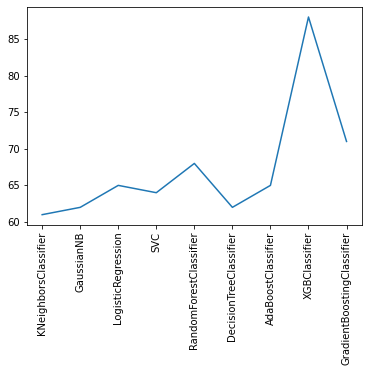

In [75]:
algorith=['KNeighborsClassifier','GaussianNB','LogisticRegression','SVC','RandomForestClassifier','DecisionTreeClassifier','AdaBoostClassifier','XGBClassifier','GradientBoostingClassifier']
accuracy=[61,62,65,64,68,62,65,88,71]
plt.plot(algorith,accuracy)
plt.xticks(rotation=90)
plt.show()